# Titanic - Machine Learning from Disaster
Kaggle -  ML basics
https://www.kaggle.com/competitions/titanic/data


In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn libaries
from sklearn.preprocessing import StandardScaler, LabelEncoder




from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler


#import os
# for dirname, _, filenames in os.walk('c:/Users/shahedkarolia/Library/CloudStorage/OneDrive-Personal/Kaggle1/KG-1'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Data Dictionary

[Add dict]

# Import Data


In [3]:
# load data
# load train.csv 
df_train = pd.read_csv("data/train.csv")
# load test.csv
df_test = pd.read_csv("data/test.csv")

# EDA

In [4]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# Summarise data by Survival By Gender
df_train.groupby(["Survived", 'Sex'])["PassengerId"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

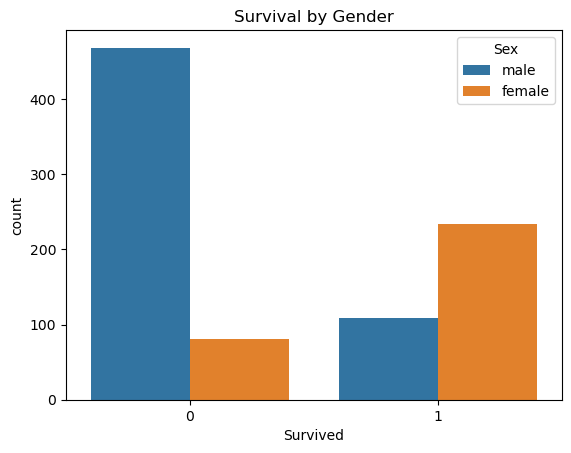

In [8]:
sns.countplot(x="Survived", data=df_train, hue='Sex')
plt.title('Survival by Gender')
plt.show()

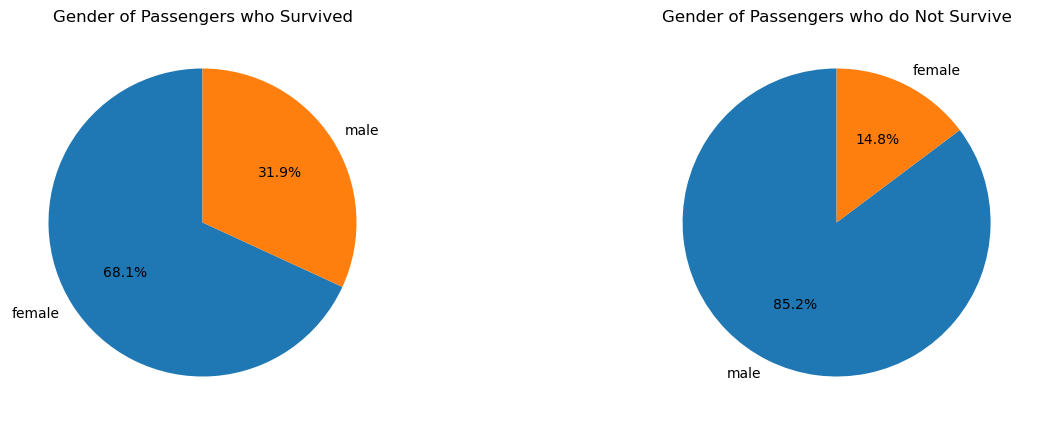

In [9]:
# Count number of male and female passengers who survived
survived = df_train.loc[df_train['Survived'] == 1, 'Sex'].value_counts()

# Count number of male and female passengers who  did NOT survive
notSurvived = df_train.loc[df_train['Survived'] == 0, 'Sex'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(survived, labels=survived.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender of Passengers who Survived')

ax[1].pie(notSurvived, labels=notSurvived.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Gender of Passengers who do Not Survive')
plt.show()

In [10]:
# check for duplicates
df_train.duplicated().sum()

0

## Review Null Values in dataset

In [11]:
# check for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# review embarked feature  null values
df_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [13]:
# replace Embarked null values with the most common (S - Southampton)
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Review Cabin Feature null values , as a % 
round((df_train['Cabin'].isnull().sum() / df_train.shape[0]) * 100, 2)

77.1

In [15]:
# As null values in Cabin feature account for 77% of data
# drop column due to large amount of missing data

df_train = df_train.drop(['Cabin'], axis=1)
print(df_train.shape)
df_train.head()

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:ylabel='Frequency'>

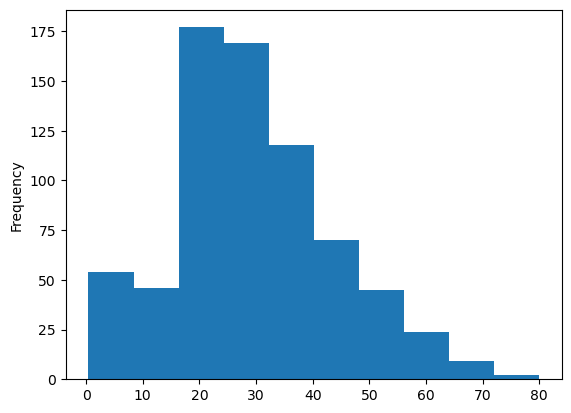

In [16]:
# Review Age feature null values
df_train['Age'].plot(kind='hist')


In [17]:
# # replace with median
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Age'].isnull().sum() 

0

<AxesSubplot:ylabel='Frequency'>

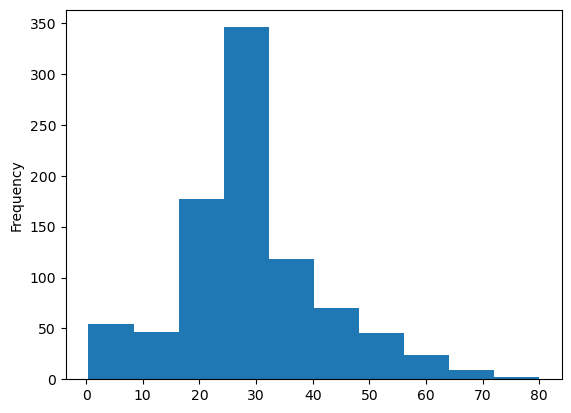

In [18]:
df_train['Age'].plot(kind='hist')

In [19]:
# Drop Age column as median replacement skews  the age distribution significantly
# In addition drop columns which do not relate to survival prediction (PassengerId, Name, Ticket)
df_train = df_train.drop(['Age','PassengerId', 'Name', 'Ticket'], axis=1)
print(df_train.shape)
df_train.head()

(891, 7)


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


## Test Dataset Preparation
* Drop Age, PassengerId, Name, Ticket, Cabin
* Check and replaced null values
* encode Sex column
* encode Embarked column
* Drop Sex and Embarked column

In [20]:
df_test = df_test.drop(['Age','PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [22]:
df_test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

35.627188489208635
14.4542
7.75


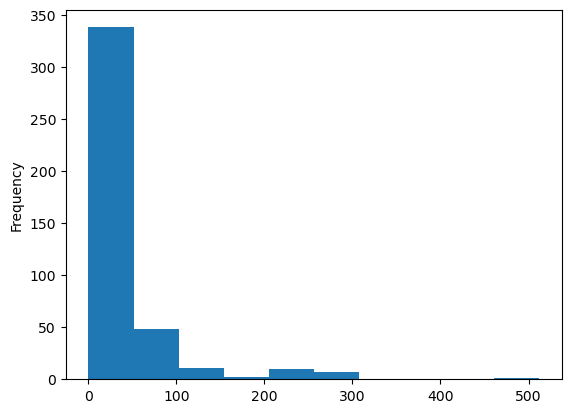

In [23]:
df_test['Fare'].plot(kind='hist')
print(df_test['Fare'].mean())
print(df_test['Fare'].median())
print(df_test['Fare'].mode()[0])


In [24]:
# Replace null value with most common fare  (mode)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mode()[0])
df_test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Preparation

In [25]:
# encode Sex Feature
label_encoder = LabelEncoder()
df_train['Gender'] =  label_encoder.fit_transform(df_train['Sex'])
df_train['Gender'].unique()
df_train.head()

# 1 == Male
# 0 == Female

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,1,0,7.2500,S,1
1,1,1,female,1,0,71.2833,C,0
2,1,3,female,0,0,7.9250,S,0
3,1,1,female,1,0,53.1000,S,0
4,0,3,male,0,0,8.0500,S,1


In [26]:
# encode Embarked Feature
df_train['EmbarkedCode'] =  label_encoder.fit_transform(df_train['Embarked'])
df_train['EmbarkedCode'].unique()
df_train.head()

# Cherbourg (C) == 0
# Queenstown (Q) == 1
# Southampton (S) == 2


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Gender,EmbarkedCode
0,0,3,male,1,0,7.2500,S,1,2
1,1,1,female,1,0,71.2833,C,0,0
2,1,3,female,0,0,7.9250,S,0,2
3,1,1,female,1,0,53.1000,S,0,2
4,0,3,male,0,0,8.0500,S,1,2


In [27]:
df_train.shape

(891, 9)

In [28]:
# Drop Sex and Embarked columns

df_train = df_train.drop(['Sex','Embarked'], axis=1)
print(df_train.shape)
df_train.head()


(891, 7)


,Survived,Pclass,SibSp,Parch,Fare,Gender,EmbarkedCode
0,0,3,1,0,7.2500,1,2
1,1,1,1,0,71.2833,0,0
2,1,3,0,0,7.9250,0,2
3,1,1,1,0,53.1000,0,2
4,0,3,0,0,8.0500,1,2


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   Gender        891 non-null    int32  
 6   EmbarkedCode  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


## Prepare  test.csv dataset

* Drop Age, PassengerId, Name, Ticket, Cabin
* Check and replaced null values
* encode Sex column
* encode Embarked column
* Drop Sex and Embarked column

In [30]:
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [31]:
df_test = df_test.drop(['Age','PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test.head()

KeyError: "['Age', 'PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [ ]:
df_test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

35.627188489208635
14.4542
7.75


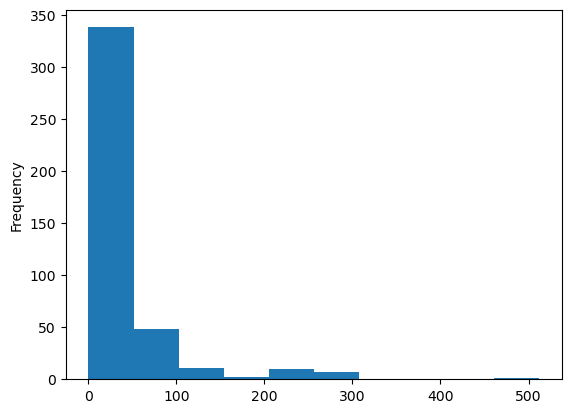

In [ ]:
df_test['Fare'].plot(kind='hist')
print(df_test['Fare'].mean())
print(df_test['Fare'].median())
print(df_test['Fare'].mode()[0])

In [ ]:
# Replace null value with most common fare  (mode)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mode()[0])
df_test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
# encode Embarked and Sex Columns
label_encoder = LabelEncoder()
df_test['Gender'] =  label_encoder.fit_transform(df_test['Sex'])
df_test['EmbarkedCode'] =  label_encoder.fit_transform(df_test['Embarked'])

# Drop all columns excluding 	Survived	Pclass	SibSp	Parch	Fare	Gender	EmbarkedCode, Age
df_test = df_test.drop(['Sex','Embarked'], axis=1)
print(df_test.shape)
df_test.head()

(418, 6)


,Pclass,SibSp,Parch,Fare,Gender,EmbarkedCode
0,3,0,0,7.8292,1,1
1,3,1,0,7.0000,0,2
2,2,0,0,9.6875,1,1
3,3,0,0,8.6625,1,2
4,3,1,1,12.2875,0,2


# Machine Learning

## Model Selection

In [33]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
## initialise Scaler object to normalise data
scaler = MinMaxScaler() # scale data to normalise
# scaler = StandardScaler()


In [37]:
# evaluate a selection of different models
models = [('Decision Tree', DecisionTreeClassifier(random_state=42)), 
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('Logistic Regression', LogisticRegression(random_state=42, max_iter=10000)), 
          ('XGBoost', XGBClassifier(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(random_state=42, probability=True))]


In [39]:
model_selection_results = [] 
model_selection_reports = []

for name, model in models:
    pipeline =  make_pipeline(scaler, model)
    # Train Model
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:,1]
    
    model_selection_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test,y_pred_proba)
    ])
    
    model_selection_reports.append([
        name,
        confusion_matrix(y_test, y_pred),
        classification_report(y_test, y_pred, output_dict=False)
    ])
    print(name)

Decision Tree
Random Forest
Logistic Regression
XGBoost
KNN
SVM


In [40]:
results_summary = pd.DataFrame(columns=['model', 'accuracy', 'precision','recall','f1-score', 'roc_auc_score'], data=model_selection_results)
results_summary

,model,accuracy,precision,recall,f1-score,roc_auc_score
0,Decision Tree,0.779851,0.754902,0.693694,0.723005,0.771877
1,Random Forest,0.783582,0.757282,0.702703,0.728972,0.821685
2,Logistic Regression,0.779851,0.732143,0.738739,0.735426,0.867591
3,XGBoost,0.791045,0.789474,0.675676,0.728155,0.819246
4,KNN,0.794776,0.811111,0.657658,0.726368,0.817697
5,SVM,0.798507,0.860759,0.612613,0.715789,0.820193


In [43]:
# Evaluate each model using cross-validation and print the mean accuracy
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name}: {scores.mean()} +/- {scores.std()}')

Decision Tree: 0.7929806451612904 +/- 0.018745078854715724
Random Forest: 0.7914451612903226 +/- 0.030981384091898486
Logistic Regression: 0.7881548387096775 +/- 0.04858460507358363
XGBoost: 0.7977935483870968 +/- 0.027159325651111087
KNN: 0.7288 +/- 0.04105208691102388
SVM: 0.6677677419354838 +/- 0.0319295165490358


# Hyperparameter Tuning

In [ ]:
# Hypertune XGboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define XGBoost model
xgb = XGBClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

# Define evaluation metric
scorer = make_scorer(f1_score)

# Perform grid search
grid = GridSearchCV(xgb, params, scoring=scorer, cv=5)
grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


In [ ]:
# hypertune random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define Random Forest model
rf = RandomForestClassifier()

# Define hyperparameters to tune
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

# Define evaluation metric
scorer = make_scorer(f1_score)

# Perform grid search
grid = GridSearchCV(rf, params, scoring=scorer, cv=5)
grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


In [ ]:
# Hypertune decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define Decision Tree model
dt = DecisionTreeClassifier()

# Define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Define evaluation metric
scorer = make_scorer(f1_score)

# Perform grid search
grid = GridSearchCV(dt, params, scoring=scorer, cv=5)
grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


# Ensemble Stacking Method (VotingClassifier)

In [ ]:
from sklearn.ensemble import  VotingClassifier
model1 = XGBClassifier(learning_rate=0.5, max_depth=7,n_estimators=100, random_state=42)
model2 = RandomForestClassifier(max_depth=7,max_features='sqrt', n_estimators=100, random_state=42)
model3 = DecisionTreeClassifier(max_depth=7,min_samples_split=10, random_state=42)

# Combine models into ensemble
ensemble_model = VotingClassifier(estimators=[('XGBoost', model1), ('RandomForest', model2), ('DecicionTree', model3)], voting='hard')



In [ ]:
# Get the results 
ensemble_model.fit(X_train, y_train)
y_pred_stack = ensemble_model.predict(X_test)
stack_report = classification_report(y_test, y_pred_stack, output_dict=True)
print(classification_report(y_test, y_pred_stack))
cm_stack = confusion_matrix(y_test,y_pred_stack, labels=ensemble_model.classes_)

In [ ]:
results =  ensemble_model.predict(df_test)